# Interpolação de lagrange

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_vals = {}
num_points = [4, 6, 8, 12]
intervalo = (-5, 5)
vals_avaliacao = [0]
exp = "1/(1+x**2)"
for n in num_points:
    x_vals[n] = np.linspace(intervalo[0], intervalo[1], n).tolist()
    print(f"valores de x para n={n}", end=": ")
    for x in x_vals[n]:
        print(f"{x:.5f}", end=", ")   
    print("\n")

valores de x para n=4: -5.00000, -1.66667, 1.66667, 5.00000, 

valores de x para n=6: -5.00000, -3.00000, -1.00000, 1.00000, 3.00000, 5.00000, 

valores de x para n=8: -5.00000, -3.57143, -2.14286, -0.71429, 0.71429, 2.14286, 3.57143, 5.00000, 

valores de x para n=12: -5.00000, -4.09091, -3.18182, -2.27273, -1.36364, -0.45455, 0.45455, 1.36364, 2.27273, 3.18182, 4.09091, 5.00000, 



In [3]:
def plot_interpolacoes(limites: tuple[float, float], pontos_interpolacao: list[float], 
                       funcoes: dict[str, str], pontos_avaliacao: list[float], title: str):
    pontos_x = np.linspace(limites[0], limites[1], 1000)
    plt.figure(figsize=(10, 6))
    for nome, funcao in funcoes.items():
        x = pontos_x
        y = eval(funcao)
        plt.plot(x, y, label=nome)
    
    y_interp = []
    x_interp = []
    for xi in pontos_interpolacao:
        if xi > limites[1] or xi < limites[0]:
            continue
        x = xi 
        y_interp.append(eval(funcoes['Polinômio de Lagrange']))
        x_interp.append(x)
    plt.scatter(x_interp, y_interp, color='red', s=50, zorder=5, label='Pontos de interpolação')

    for ponto in pontos_avaliacao:
        x = ponto
        y_vals = {}
        for nome, funcao in funcoes.items():
            y = eval(funcao)
            y_vals[nome] = y
            plt.scatter(x, y, s=80, zorder=5, label=f'{nome} = ({x}, {y:.6f})')

    
    plt.title(f'{title}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

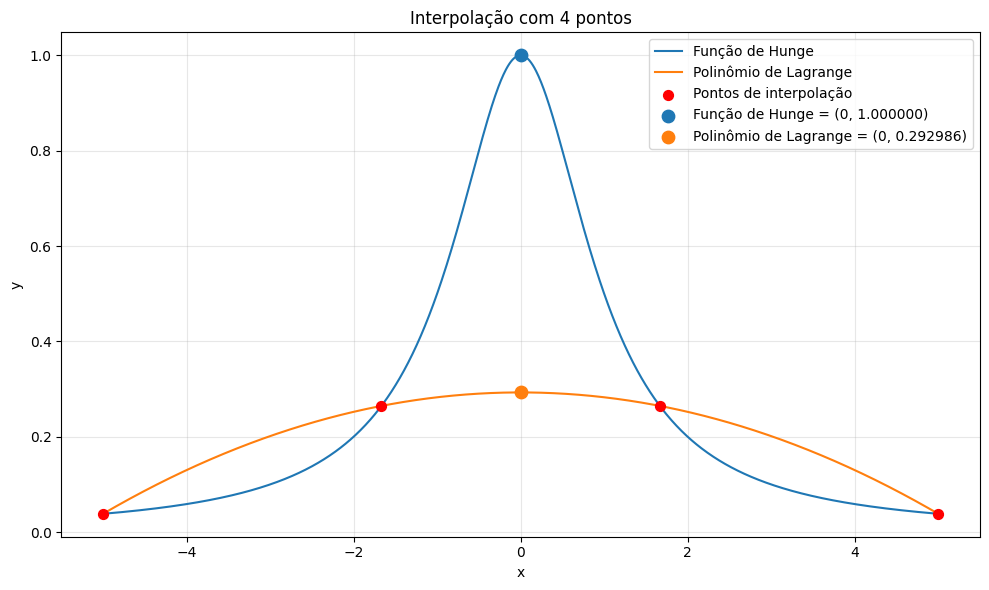

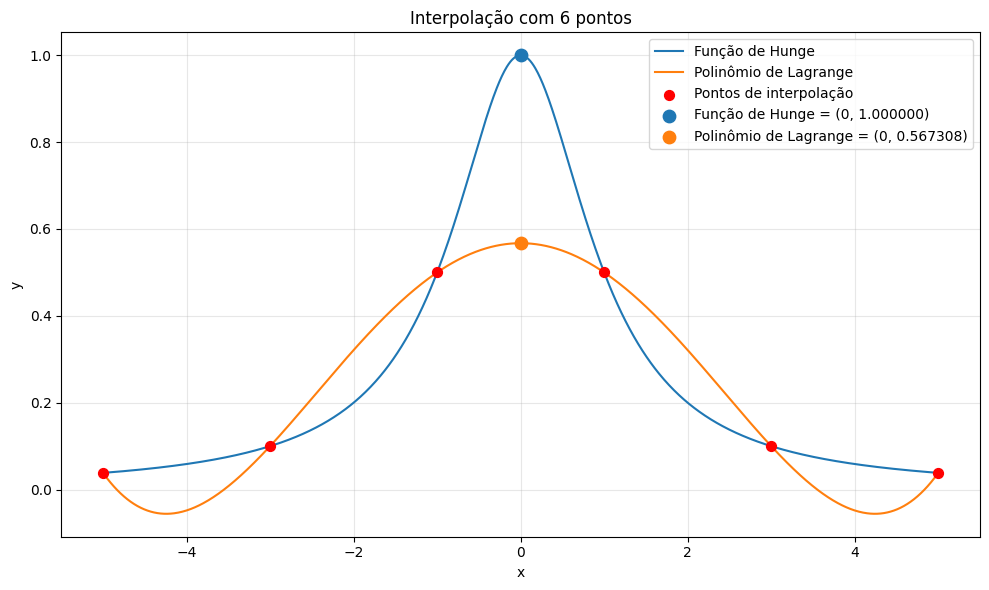

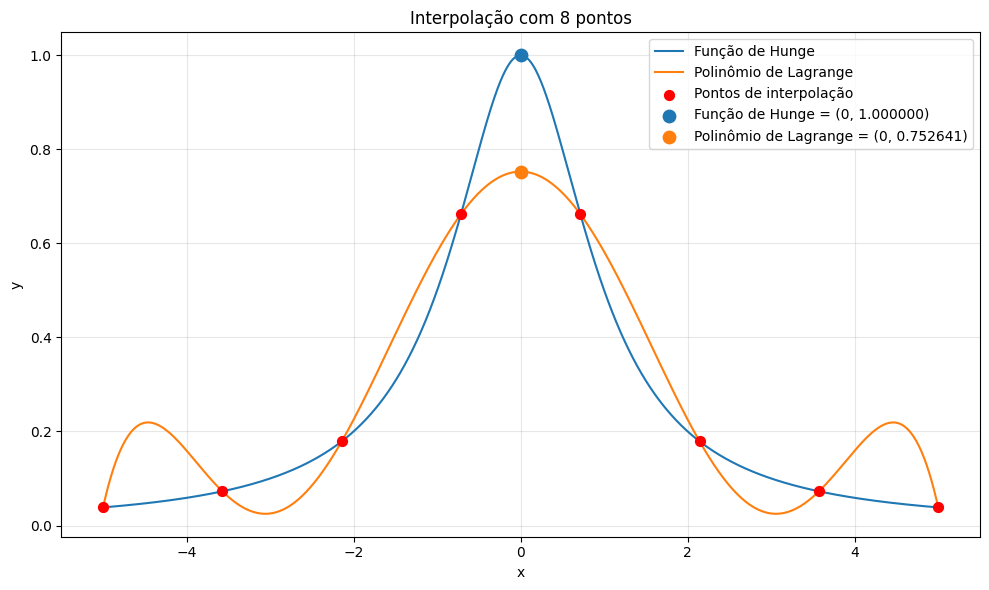

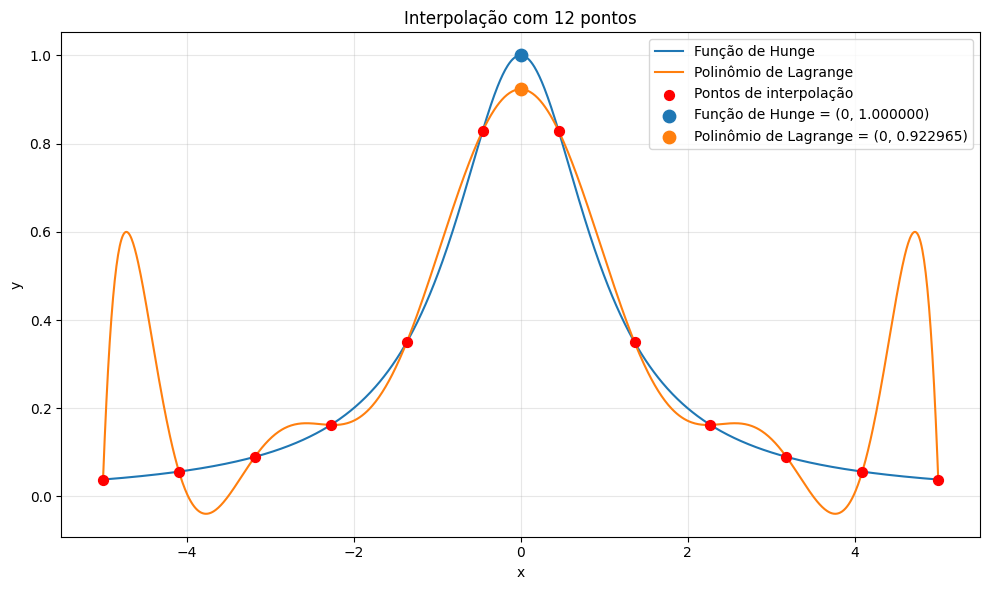

In [4]:
funcoes = {
    4: {
        'Função de Hunge': exp,
        'Polinômio de Lagrange': '-9/52000*(x + 5/3)*(x - 5/3)*(x - 5) + 243/68000*(x + 5)*(x - 5/3)*(x - 5) \
                                +9/52000*(x + 5/3)*(x - 5/3)*(x + 5) - 243/68000*(x + 5)*(x + 5/3)*(x - 5)'
    },
    6: {
        'Função de Hunge': exp,
        'Polinômio de Lagrange': '1/520*x**4 - 9/130*x**2 + 59/104'
    },
    8: {
        'Função de Hunge': exp,
        'Polinômio de Lagrange': '- 4.06575814682064e-20*x**7  - 0.000331110316977458*x**6  + 1.04083408558608e-17*x**5  \
                                    + 0.0145215524731542*x**4  + 1.59594559789866e-16*x**3  - 0.18466205791711*x**2  \
                                    + 1.50920942409982e-16*x + 0.752641393440685'
    },
    12: {
        'Função de Hunge': exp,
        'Polinômio de Lagrange': '- 3.14990377260193e-21*x**11   - 9.16454575966877e-6*x**10   + 6.86096687275983e-19*x**9 \
                                + 0.000550705886103721*x**8  + 9.19640611492939e-17*x**7  - 0.011795520907711*x**6 \
                                + 4.94938291739633e-16*x**5  + 0.111616891869634*x**4  - 4.80301562411078e-16*x**3  \
                                - 0.478480653192072*x**2  - 8.82642212356871e-17*x**1 + 0.9229650577178'
    },
}





for n in num_points:
    plot_interpolacoes(limites=intervalo,
                        pontos_interpolacao=x_vals[n],
                        funcoes=funcoes[n],
                        pontos_avaliacao=vals_avaliacao,
                        title=f'Interpolação com {n} pontos')
    

# Interpolação de lagrange com pontos de Chebyshev

In [5]:
import sympy as sp

In [6]:
def multiplicador_de_lagrange(x_list: list[float], k: int) -> float:
    """
    Calcula o k-ésimo multiplicador de Lagrange em um ponto específico.

    Args:
        x_list (list[float]): Lista de valores x dos pontos de interpolação.
        k (int): O índice do multiplicador de Lagrange a ser calculado.

    Returns:
        float: O valor do k-ésimo multiplicador de Lagrange em x_val.
    """
    termo = 1.0

    x = sp.symbols('x')
    for i in range(len(x_list)):
        if i != k:
            termo *= (x - x_list[i]) / (x_list[k] - x_list[i])

    return termo

In [7]:
def polimonimo_lagrange(x_vals: list[float], y_val: list[float]) -> sp.Expr:
    """
    Calcula o valor do polinômio interpolador de Lagrange em um ponto específico.
    Args:
        x_vals (list[float]): Lista de valores x dos pontos de interpolação.
        y_val (list[float]): Lista de valores y dos pontos de interpolação.
    Returns:
        sp.Expr: O polinômio interpolador de Lagrange como uma expressão simbólica.
    """
    
    if len(x_vals) != len(y_val):
        raise ValueError("As listas de valores x e y devem ter o mesmo tamanho.")
    
    resultado = 0.0
    for i in range(len(x_vals)):
        Lk = multiplicador_de_lagrange(x_vals, i)
        resultado += y_val[i] * Lk
    return sp.simplify(resultado) # devolve a expressão final simplificada

In [8]:
def get_y_values(x_vals: list[float], function: sp.Expr | str) -> list[float]:
    """
    Gera os valores y correspondentes para uma função dada em uma lista de valores x.

    Args:
        x_vals (list[float]): Lista de valores x.
        function (sp.Expr): Função simbólica para calcular os valores y.

    Returns:
        list[float]: Lista de valores y correspondentes.
    """
    if isinstance(function, str):
        function = sp.sympify(function)
    y_vals = []
    x = sp.symbols('x')
    for xv in x_vals:
        yv = function.subs(x, xv).evalf()
        y_vals.append(float(yv))
    return y_vals

In [9]:
pontos_chebyshev = {}
for n in num_points:
    pontos_chebyshev[n] = []
    for k in range(n):
        xk = (intervalo[0] + intervalo[1]) / 2 + (intervalo[1] - intervalo[0]) / 2 * np.cos((2*k + 1) * np.pi / (2*n))
        pontos_chebyshev[n].append(xk)
    print(f"valores de x chebyshev para n={n}", end=": ")
    for x in pontos_chebyshev[n]:
        print(f"{x:.5f}", end=", ")   
    print("\n")

valores de x chebyshev para n=4: 4.61940, 1.91342, -1.91342, -4.61940, 

valores de x chebyshev para n=6: 4.82963, 3.53553, 1.29410, -1.29410, -3.53553, -4.82963, 

valores de x chebyshev para n=8: 4.90393, 4.15735, 2.77785, 0.97545, -0.97545, -2.77785, -4.15735, -4.90393, 

valores de x chebyshev para n=12: 4.95722, 4.61940, 3.96677, 3.04381, 1.91342, 0.65263, -0.65263, -1.91342, -3.04381, -3.96677, -4.61940, -4.95722, 



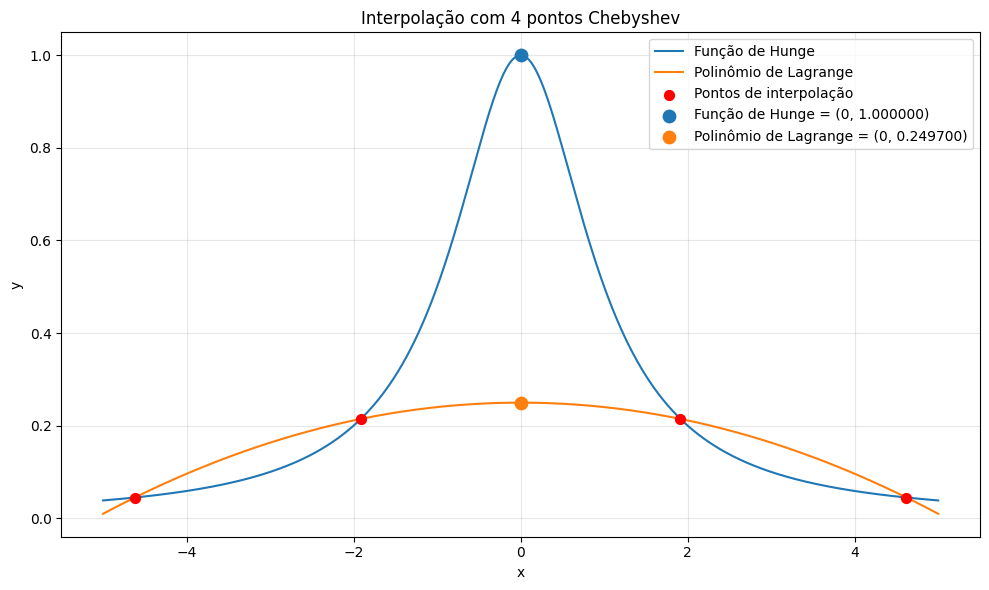

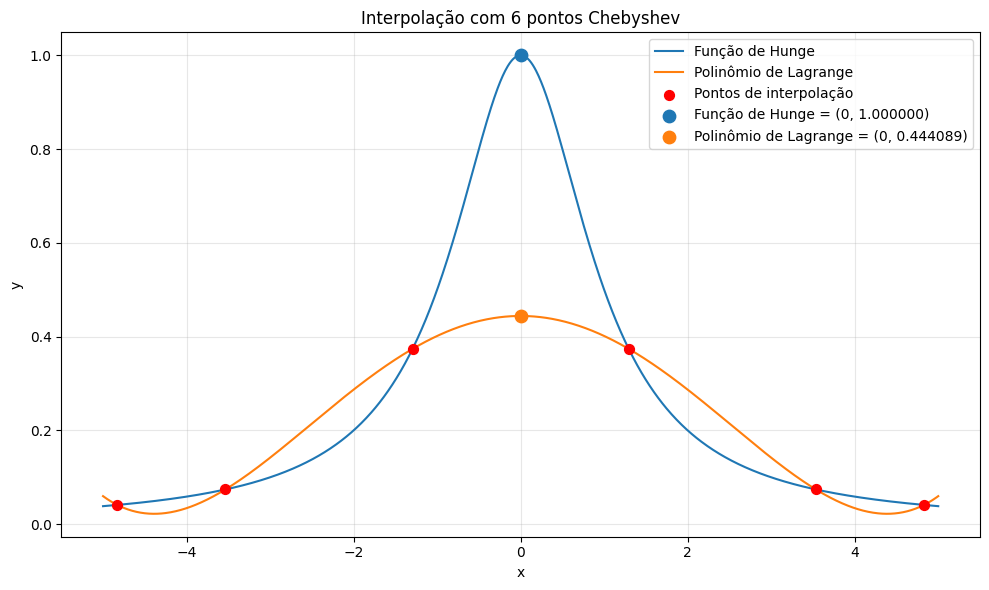

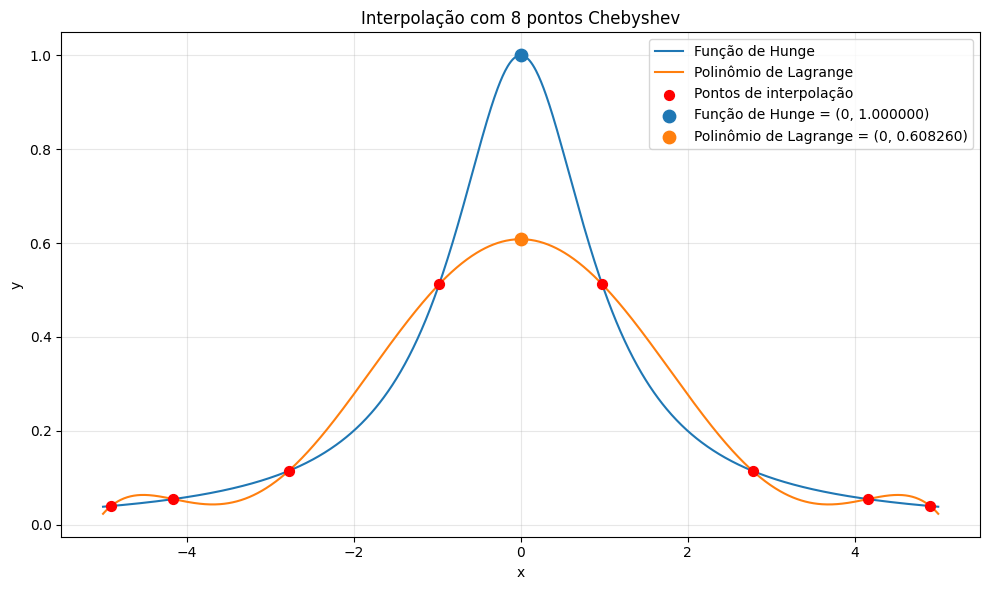

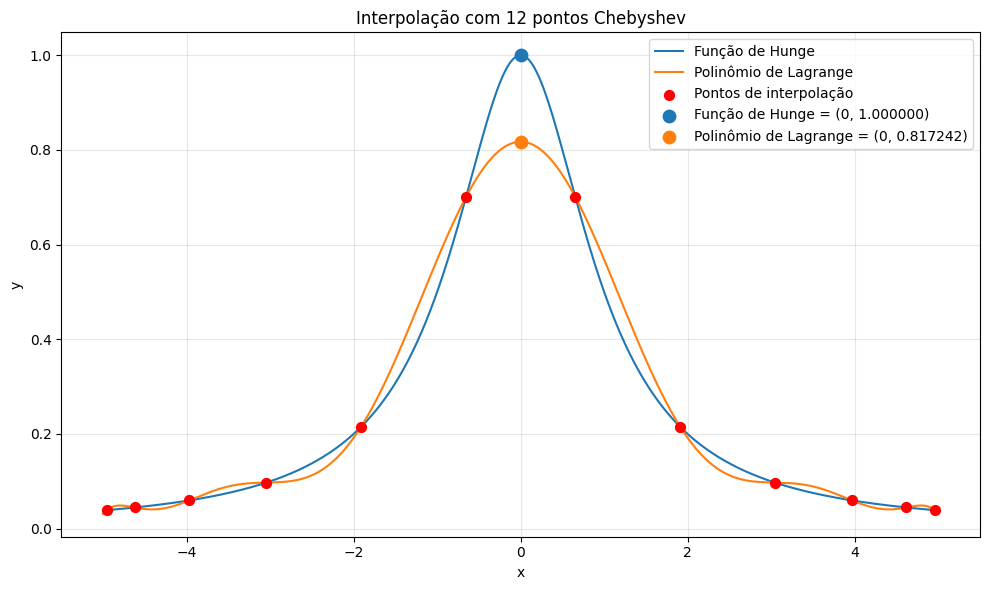

In [10]:
for n in num_points:
    y_vals_chebyshev = get_y_values(pontos_chebyshev[n], exp)
    eq_lagrange_chebyshev = polimonimo_lagrange(pontos_chebyshev[n], y_vals_chebyshev)
    funcoes_chebyshev = {
        'Função de Hunge': exp,
        'Polinômio de Lagrange': str(eq_lagrange_chebyshev)
    }
    plot_interpolacoes(intervalo, pontos_chebyshev[n], funcoes_chebyshev, vals_avaliacao, f'Interpolação com {n} pontos Chebyshev')